In [2]:
import pandas as pd
#import numpy as np
#import re

In [4]:
df = pd.read_csv('AtlantaPrices_Processed.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14303 entries, 0 to 14302
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   destinationAirport   14303 non-null  object 
 1   isBasicEconomy       14303 non-null  bool   
 2   isNonStop            14303 non-null  bool   
 3   baseFare             14303 non-null  float64
 4   seatsRemaining       14303 non-null  float64
 5   totalTravelDistance  14303 non-null  float64
 6   totalTravelDuration  14303 non-null  int64  
 7   weeknum              14303 non-null  int64  
 8   time_of_departure    14303 non-null  object 
 9   time_of_arrival      14303 non-null  object 
 10  no_airlines          14303 non-null  int64  
 11  no_layovers          14303 non-null  int64  
 12  segmentsCabinCode_1  14303 non-null  object 
dtypes: bool(2), float64(3), int64(4), object(4)
memory usage: 1.2+ MB


In [6]:
df.head()

,destinationAirport,isBasicEconomy,isNonStop,baseFare,seatsRemaining,totalTravelDistance,totalTravelDuration,weeknum,time_of_departure,time_of_arrival,no_airlines,no_layovers,segmentsCabinCode_1
0,BOS,False,True,217.67,9.0,947.0,149,15,Mid-Day,Mid-Day,1,1,coach
1,BOS,False,True,217.67,4.0,947.0,150,15,Morning,Mid-Day,1,1,coach
2,BOS,False,True,217.67,9.0,947.0,150,15,Mid-Day,Mid-Day,1,1,coach
3,BOS,False,True,217.67,8.0,947.0,152,15,Mid-Day,Night,1,1,coach
4,BOS,False,True,217.67,9.0,947.0,154,15,Mid-Day,Mid-Day,1,1,coach


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

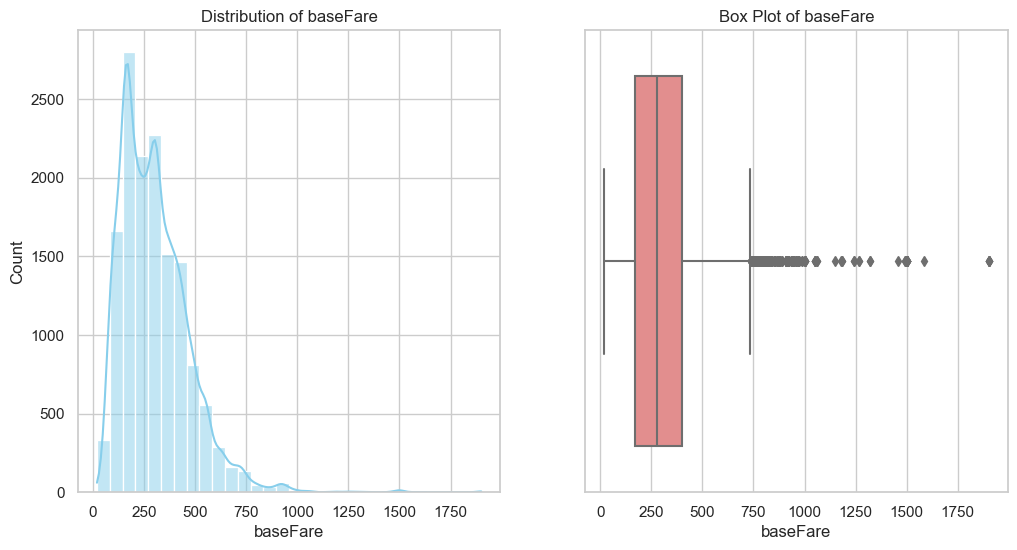

In [8]:
# Histogram and Box Plot for baseFare
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['baseFare'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of baseFare')

plt.subplot(1, 2, 2)
sns.boxplot(x='baseFare', data=df, color='lightcoral')
plt.title('Box Plot of baseFare')

plt.show()

/var/folders/pm/7_c6d29j25j2lpglc8wdcc340000gn/T/ipykernel_19728/3810911212.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


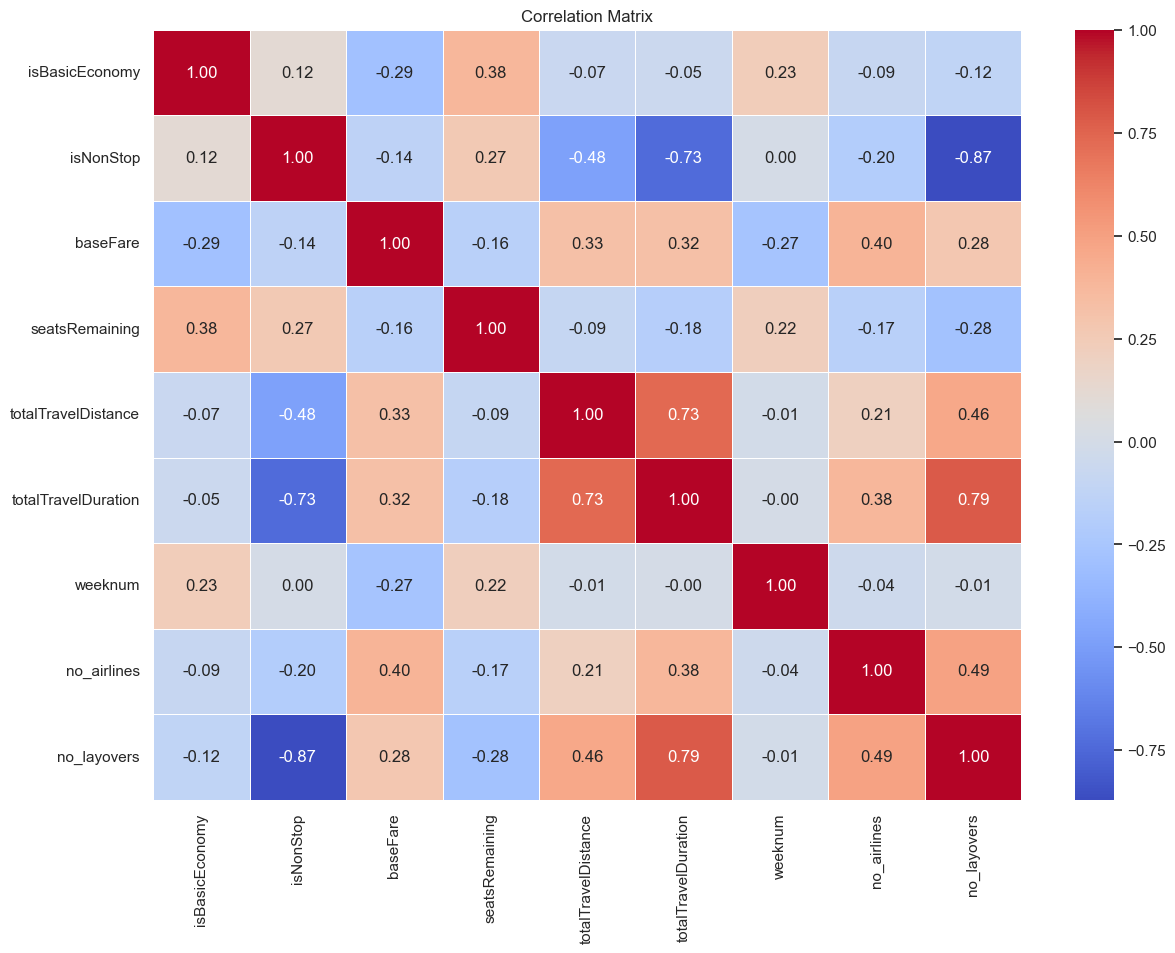

In [9]:
# Correlation Matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


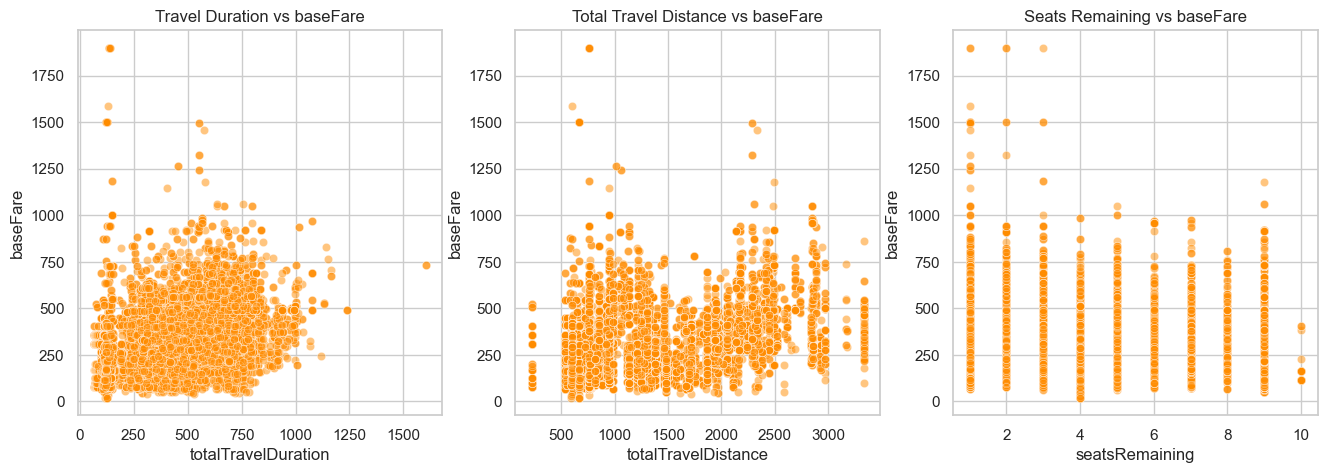

In [12]:
# Scatter Plots
scatter_features = ['totalTravelDuration', 'totalTravelDistance', 'seatsRemaining']
scatter_labels = ['Travel Duration vs baseFare', 'Total Travel Distance vs baseFare', 'Seats Remaining vs baseFare']

plt.figure(figsize=(16, 5))
for i in range(len(scatter_features)):
    plt.subplot(1, len(scatter_features), i+1)
    sns.scatterplot(x=scatter_features[i], y='baseFare', data=df, color='darkorange', alpha=0.5)
    plt.title(scatter_labels[i])

plt.show()

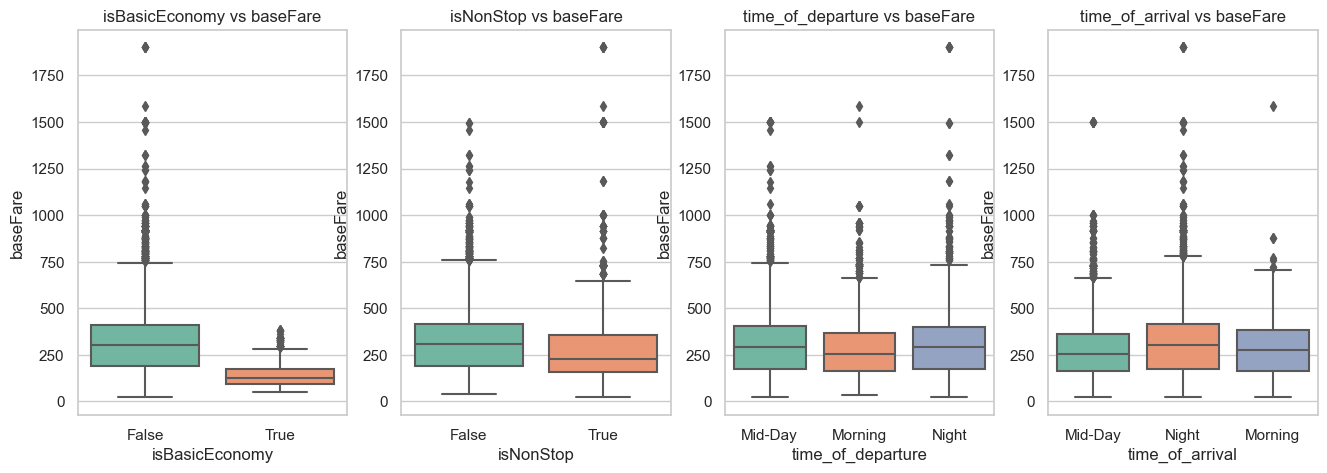

In [14]:
# Categorical Plots
categorical_features = ['isBasicEconomy', 'isNonStop','time_of_departure','time_of_arrival']

plt.figure(figsize=(16, 5))
for i in range(len(categorical_features)):
    plt.subplot(1, len(categorical_features), i+1)
    sns.boxplot(x=categorical_features[i], y='baseFare', data=df, palette='Set2')
    plt.title(f'{categorical_features[i]} vs baseFare')

plt.show()

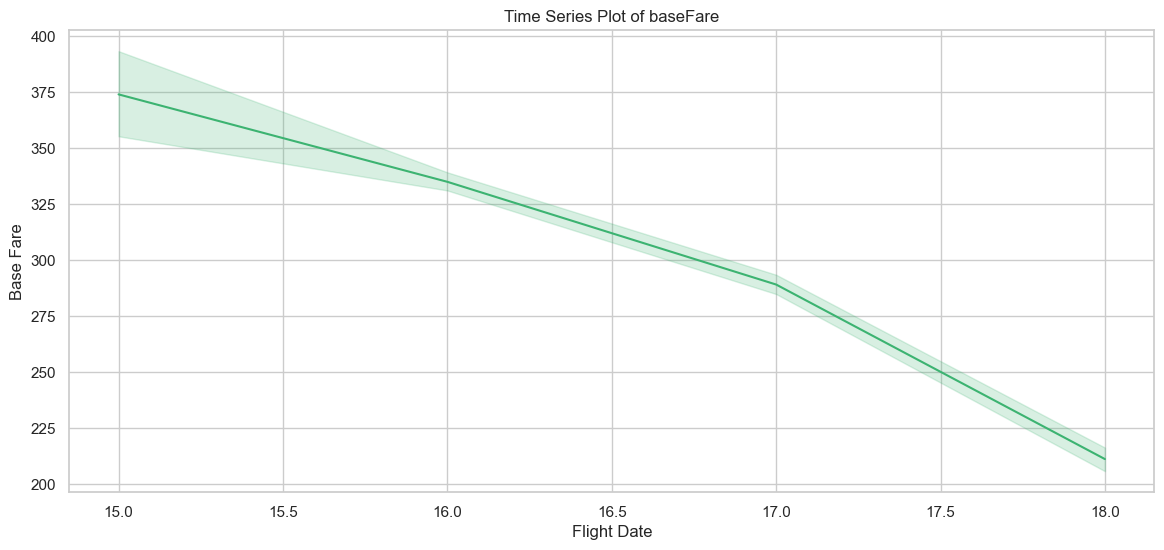

In [16]:
# Time Series Plot 
time_series_df = df.set_index('weeknum')['baseFare']

plt.figure(figsize=(14, 6))
sns.lineplot(x=time_series_df.index, y=time_series_df.values, color='mediumseagreen')
plt.title('Time Series Plot of baseFare')
plt.xlabel('Flight Date')
plt.ylabel('Base Fare')
plt.show()


In [19]:
df2 = pd.read_csv('Atlanta Prices.csv')

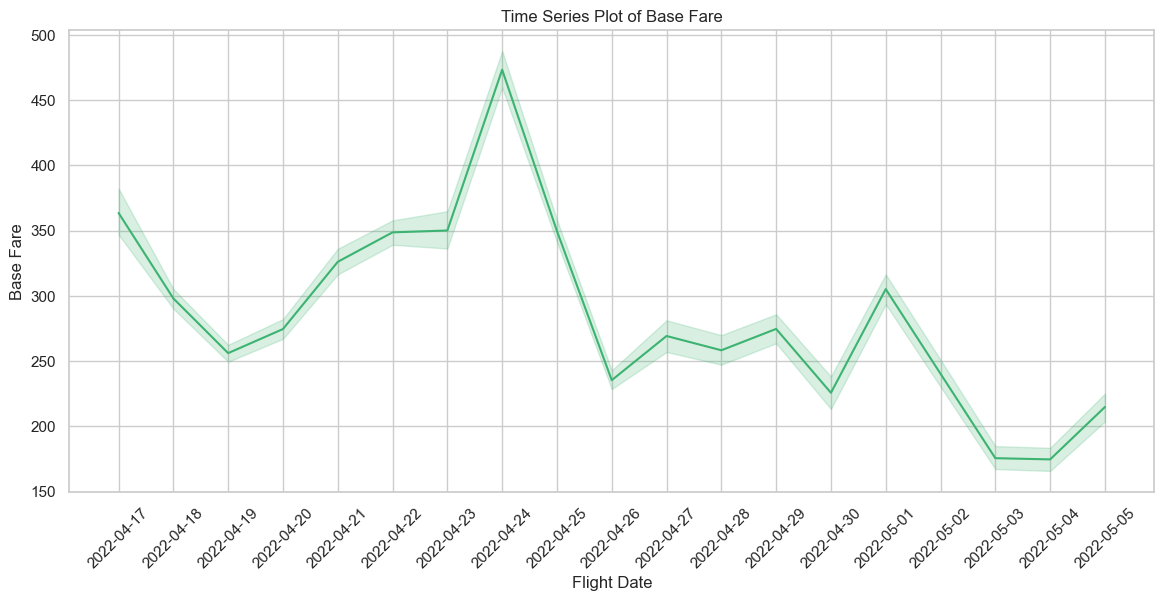

In [26]:
time_series_df = df2.set_index('flightDate')['baseFare']

plt.figure(figsize=(14, 6))
sns.lineplot(x=time_series_df.index, y=time_series_df.values, color='mediumseagreen')
plt.title('Time Series Plot of Base Fare')
plt.xlabel('Flight Date')
plt.ylabel('Base Fare')
plt.xticks(rotation=45)
plt.show()